In [1]:
%matplotlib inline
import sys
from collections import defaultdict
import matplotlib.pylab as plt

In [2]:
sys.path.insert(0, '../')
from workers import load_sensible_data as lsd

### Preliminary analysis

In [292]:
tc0 = {'hours': range(24), 'days': range(7), 'spans': [("06/01/14","24/01/14")]} #in school
df_tmp = lsd.load(tc0['spans'], "screen")

<2014> jan


In [76]:
## Investigating on/off patterns
a, a_t = 0, []
e11, e11_t = 0, []
e00, e00_t = 0, []
u_e11 = defaultdict(int)
u_e00 = defaultdict(int)

users = sorted(set(df_tmp['user']))
df_tmp = df_tmp.sort(['user','timestamp'],ascending=[1,1])
for u in users:
    df = df_tmp[df_tmp['user'] == u]
    screen_on = list(df['screen_on'])
    for i, _ in enumerate(screen_on):
        if i == 0: continue
        if screen_on[i] == 1 and screen_on[i-1] == 1:
            e11 += 1
            u_e11[u] += 1
            e11_t.append(df.iloc[i,:]['timestamp']-df.iloc[i-1,:]['timestamp'])
        elif screen_on[i] == 0 and screen_on[i-1] == 0:
            e00 += 1
            u_e00[u] += 1
            e00_t.append(df.iloc[i,:]['timestamp']-df.iloc[i-1,:]['timestamp'])
        else:
            a += 1
            a_t.append(df.iloc[i,:]['timestamp']-df.iloc[i-1,:]['timestamp'])
    print u,

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136 138 139 140 141 142 143 144 145 146 147 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209

KeyboardInterrupt: 

11 rate: 0.41%
11 time: 6265.1785489
10 time: 644.97753824


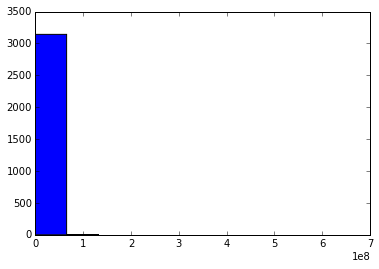

In [84]:
print "11 rate: %0.2f%%" % (e11*100.0/(a+e11+e00))
print "11 time:", sum(e11_t)*0.001/e11
print "10 time:", sum(a_t)*0.001/a
plt.hist(e11_t)
plt.xlim()
plt.show()

00 rate: 0.10%
00 time: 4562.12466844
10 time: 644.97753824


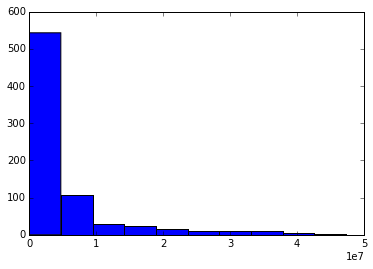

In [83]:
print "00 rate: %0.2f%%" % (e00*100.0/(a+e11+e00))
print "00 time:", sum(e00_t)*0.001/e00
print "10 time:", sum(a_t)*0.001/a
plt.hist(e00_t)
plt.xlim()
plt.show()

In [2]:
%matplotlib inline
import sys
from collections import defaultdict
import matplotlib.pylab as plt

In [3]:
cd ..

/home/ulf/build_dataset


In [4]:
from extractors.screen_extractor import Screen_extractor
from extractors.sms_extractor import Sms_extractor
from extractors.stop_locations_extractor import Stop_locations_extractor
from extractors.bluetooth_extractor import Bluetooth_extractor

In [11]:
tc0 = {'hours': range(24), 'days': range(7), 'spans': [("06/01/14","24/01/14"), ("03/02/14","16/05/14"), ("01/09/14","05/12/14"), ("02/06/14","20/06/14")]} #in school
sms = Bluetooth_extractor(tc0, suppress=[0], auxlabel="tc0_", load_old_datasources=True)

[bluetooth] Loading datasource from local.
[bluetooth] Number of datapoints in range: 3312659


In [12]:
sms.main(3)

{}

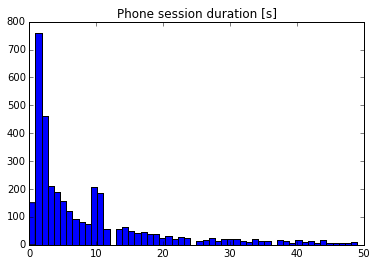

In [202]:
plt.hist(x,bins=8000)
plt.title("Phone session duration [s]")
plt.xlim([0,50])
plt.show()

In [237]:
x = [dt.fromtimestamp(i['timestamp']) for i in sessions if i['timestamp'] <= sessions[0]['timestamp']+86400]

(735239.0, 735240.0)

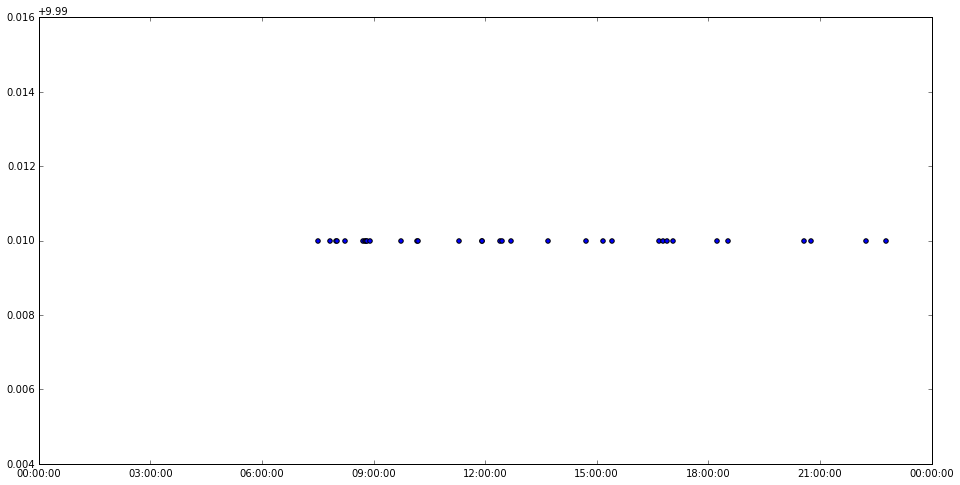

In [256]:
plt.figure(figsize=(16,8))
plt.scatter(x, [10]*len(x))
plt.xlim([x[0].date(),x[-1].date()])

In [257]:
x

[datetime.datetime(2014, 1, 6, 7, 30),
 datetime.datetime(2014, 1, 6, 7, 50, 7),
 datetime.datetime(2014, 1, 6, 7, 58, 56),
 datetime.datetime(2014, 1, 6, 8, 1, 28),
 datetime.datetime(2014, 1, 6, 8, 13, 30),
 datetime.datetime(2014, 1, 6, 8, 42, 20),
 datetime.datetime(2014, 1, 6, 8, 46, 50),
 datetime.datetime(2014, 1, 6, 8, 47, 15),
 datetime.datetime(2014, 1, 6, 8, 48, 43),
 datetime.datetime(2014, 1, 6, 8, 54, 47),
 datetime.datetime(2014, 1, 6, 9, 44, 52),
 datetime.datetime(2014, 1, 6, 10, 10, 54),
 datetime.datetime(2014, 1, 6, 10, 11, 4),
 datetime.datetime(2014, 1, 6, 11, 17, 7),
 datetime.datetime(2014, 1, 6, 11, 54, 49),
 datetime.datetime(2014, 1, 6, 11, 55, 6),
 datetime.datetime(2014, 1, 6, 12, 23, 43),
 datetime.datetime(2014, 1, 6, 12, 27, 19),
 datetime.datetime(2014, 1, 6, 12, 41, 26),
 datetime.datetime(2014, 1, 6, 13, 41, 35),
 datetime.datetime(2014, 1, 6, 14, 42, 19),
 datetime.datetime(2014, 1, 6, 15, 10, 27),
 datetime.datetime(2014, 1, 6, 15, 24, 25),
 datetim

In [253]:
datetime.timedelta(1).total_seconds()

86400.0

In [151]:
start = dt.now()
for row in df.iterrows():
    a = row[1]['screen_on']
    b = row[1]['timestamp']
print dt.now() - start

0:00:00.096809


In [150]:
type(df.iterrows().next()[1]['screen_on'])

numpy.int64

In [270]:

dataset_X = {}

for user in users:

    if user%10 == 0:
        print user,

    datapoint_x = {}

    # Ordered by execution speed
    try:
        datapoint_x.update(screen.main(user))
    except Exception as e:
        print "<"+str(e)+">",
        continue

    dataset_X[user] = datapoint_x

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160

KeyboardInterrupt: 

In [274]:
tc0_screen_session_duration = [v['tc0_screen_session_duration'] for _,v in dataset_X.items()]
tc0_screen_session_frequency = [v['tc0_screen_session_frequency'] for _,v in dataset_X.items()]
tc0_screen_summed_usage = [v['tc0_screen_summed_usage'] for _,v in dataset_X.items()]

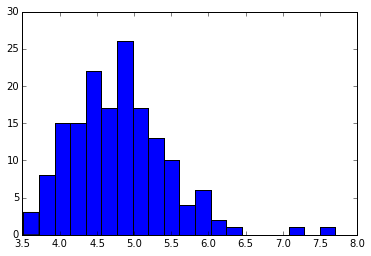

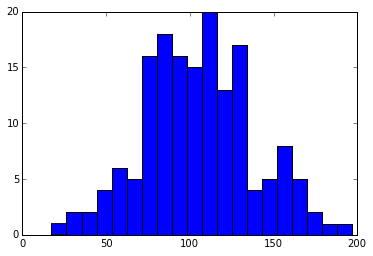

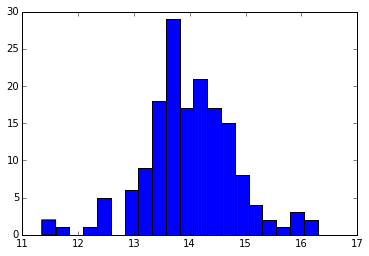

In [289]:
plt.hist(np.log(tc0_screen_session_duration),bins=20)
plt.show()
plt.hist(np.sqrt(np.array(tc0_screen_session_frequency)),bins=20)
plt.show()
plt.hist(np.log(tc0_screen_summed_usage),bins=20)
plt.show()